# Scaricare il file JSON
Scarico il file JSON. Uso la libreria requests per fare una richiesta HTTP e ottenere i dati.

In [1]:
import requests

url = 'https://dati.regione.sicilia.it/dataset/1550ec68-e4d2-49ee-b86e-6556b6cae303/resource/5c7f9425-f36e-47b3-9854-3d277b41bb7d/download/cause_morte.json'
response = requests.get(url)

# Verifica se la richiesta è stata eseguita con successo
if response.status_code == 200:
    print("File scaricato con successo!")
    data = response.json()
else:
    print("Errore nel download del file:", response.status_code)


File scaricato con successo!


# Carico i dati in un Dataframe

In [24]:
import pandas as pd

# Carico i dati nel DataFrame
df = pd.DataFrame(data)

# Visualizzo le prime righe per capire la struttura dei dati
print(df.head())


     PERIODO  TERRITORIO                          PATOLOGIA  MASCHI  FEMMINE
0  2009-2017       81001  Malattie infettive e parassitarie       4        6
1  2009-2017       81001                        Tubercolosi       1        1
2  2009-2017       81001                     Epatite virale       1        0
3  2009-2017       81001                             Tumore     560      435
4  2009-2017       81001                     Tumori maligni     545      426


In [25]:
print(df.info())  # Mostra informazioni sulle colonne e il numero di valori non nulli


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17085 entries, 0 to 17084
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PERIODO     17085 non-null  object
 1   TERRITORIO  17085 non-null  int64 
 2   PATOLOGIA   17085 non-null  object
 3   MASCHI      17085 non-null  int64 
 4   FEMMINE     17085 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 667.5+ KB
None


Somma dei decessi per maschi e femmine: 

In [27]:
total_deaths = df[['MASCHI', 'FEMMINE']].sum()
print(total_deaths)


MASCHI     452979
FEMMINE    433167
dtype: int64


# Esporto i dati in un file CSV

In [28]:

df.to_csv('cause_morte_sicilia.csv', index=False)

print("File CSV esportato con successo!")


File CSV esportato con successo!


# Raggruppare i dati per patologia e territorio

Poiché le patologie si ripetono per ogni territorio,  raggruppo i dati prima per PATOLOGIA e poi per TERRITORIO. In questo modo posso sommare i decessi per MASCHI e FEMMINE e avere il totale delle morti per ciascun gruppo.

In [29]:
# Raggruppare i dati per patologia e territorio e sommare i valori per maschi e femmine
df_aggregato = df.groupby(['PERIODO', 'PATOLOGIA', 'TERRITORIO']).agg({
    'MASCHI': 'sum',
    'FEMMINE': 'sum'
}).reset_index()

# Aggiungere una colonna "TOTALE" che è la somma dei decessi maschili e femminili
df_aggregato['TOTALE'] = df_aggregato['MASCHI'] + df_aggregato['FEMMINE']

# Visualizzare i dati aggregati
df_aggregato.head()


,PERIODO,PATOLOGIA,TERRITORIO,MASCHI,FEMMINE,TOTALE
0,2009-2017,AIDS (malattia da HIV),83032,1,0,1
1,2009-2017,AIDS (malattia da HIV),87011,1,0,1
2,2009-2017,AIDS (malattia da HIV),87015,2,2,4
3,2009-2017,AIDS (malattia da HIV),87025,1,0,1
4,2009-2017,Abuso di alcool (compresa psicosi alcolica),81001,1,0,1


In [30]:
df_aggregato.to_csv('cause_morte_sicilia_aggregato.csv', index=False)


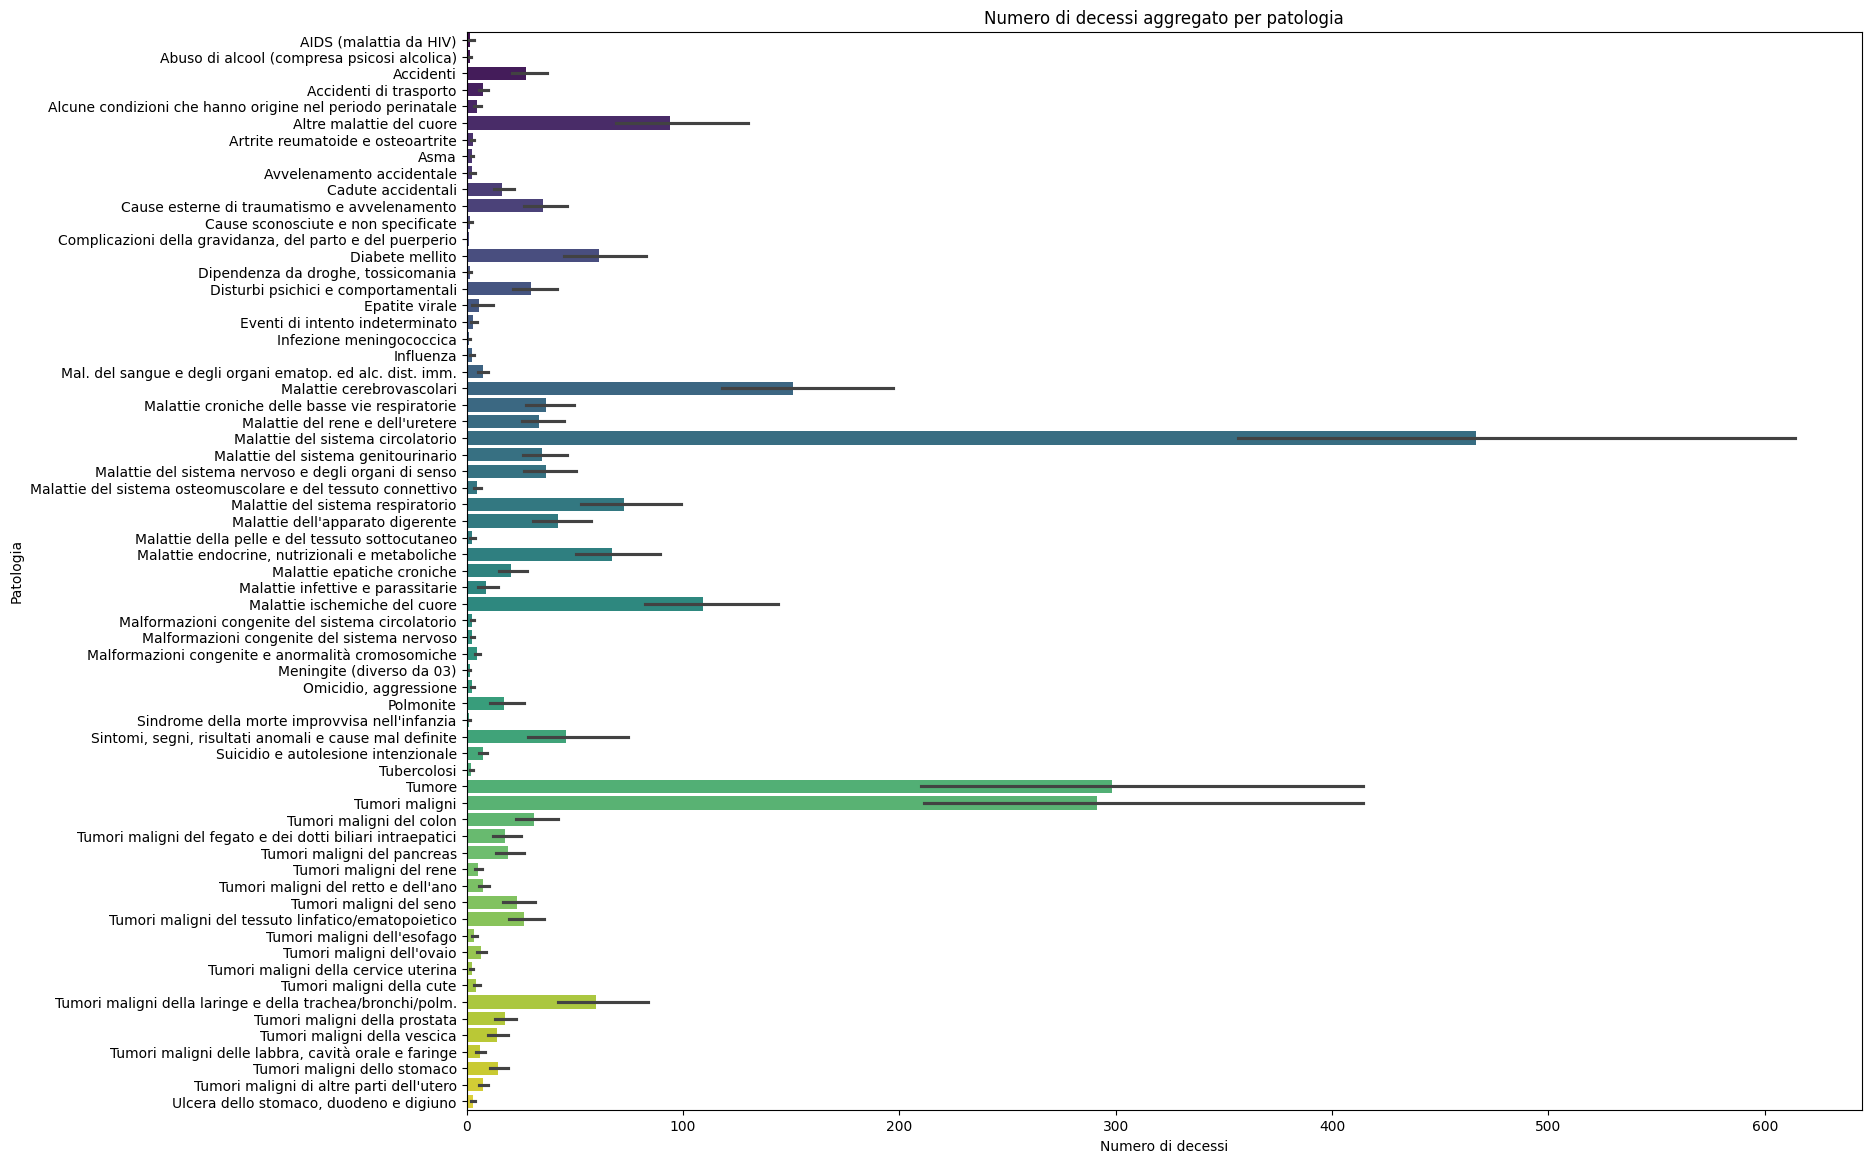

In [34]:
plt.figure(figsize=(18, 14))
sns.barplot(x='TOTALE', y='PATOLOGIA', hue='PATOLOGIA', data=df_aggregato, palette='viridis')
plt.xlabel('Numero di decessi')
plt.ylabel('Patologia')
plt.title('Numero di decessi aggregato per patologia')
plt.show()


# *Top 10 patologie con il maggior numero di casi nei maschi*

In [35]:

df['MASCHI'] = pd.to_numeric(df['MASCHI'])  # Converte a numerico, tralasciando errori

# Calcola le top 10 patologie per maschi
top_10_patologie_maschi = df.groupby('PATOLOGIA')['MASCHI'].sum().sort_values(ascending=False).head(10)

# Visualizza il risultato
print(top_10_patologie_maschi)


PATOLOGIA
Malattie del sistema circolatorio                             81203
Tumore                                                        66537
Tumori maligni                                                65183
Malattie ischemiche del cuore                                 23722
Malattie cerebrovascolari                                     23689
Tumori maligni della laringe e della trachea/bronchi/polm.    18343
Malattie del sistema respiratorio                             16800
Altre malattie del cuore                                      16310
Malattie endocrine, nutrizionali e metaboliche                11474
Diabete mellito                                               10548
Name: MASCHI, dtype: int64


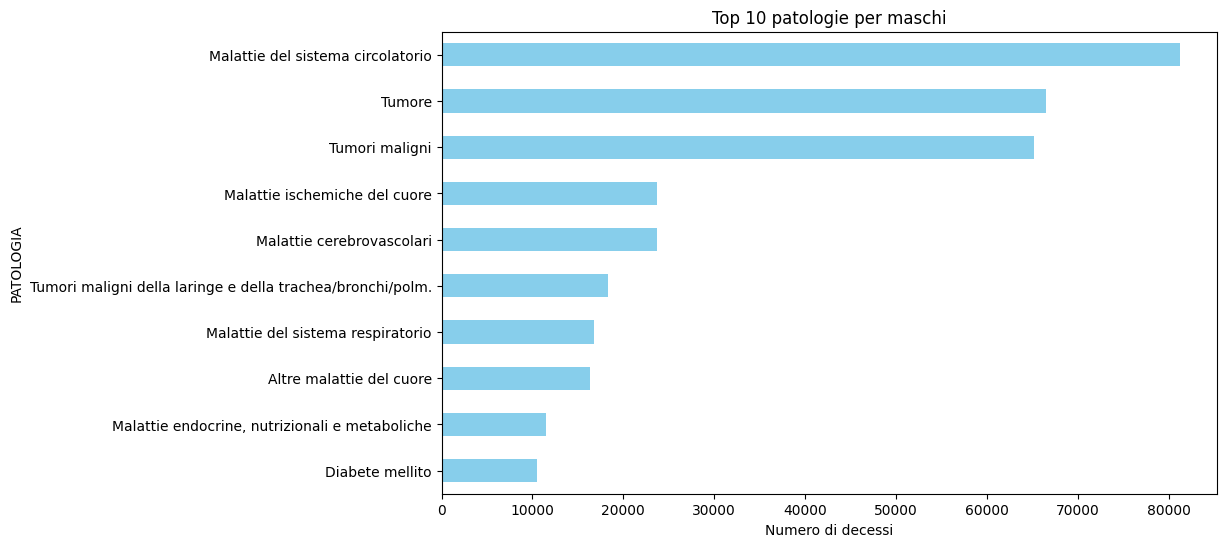

In [36]:
plt.figure(figsize=(10, 6))
top_10_patologie_maschi.plot(kind='barh', color='skyblue')
plt.xlabel('Numero di decessi')
plt.title('Top 10 patologie per maschi')
plt.gca().invert_yaxis()  # Per ordinare dal più alto al più basso
plt.show()


 # *Top 10 patologie con il maggior numero di casi nelle femmine*

In [39]:
df['FEMMINE'] = pd.to_numeric(df['FEMMINE'], errors='coerce')  # Converte a numerico, tralasciando errori

top_10_patologie_femmine = df.groupby('PATOLOGIA')['FEMMINE'].sum().sort_values(ascending=False).head(10)

print(top_10_patologie_femmine)



PATOLOGIA
Malattie del sistema circolatorio                         100710
Tumore                                                     49733
Tumori maligni                                             48453
Malattie cerebrovascolari                                  35189
Altre malattie del cuore                                   20423
Malattie ischemiche del cuore                              18846
Malattie endocrine, nutrizionali e metaboliche             14698
Diabete mellito                                            13290
Malattie del sistema respiratorio                          11455
Sintomi, segni, risultati anomali e cause mal definite     10962
Name: FEMMINE, dtype: int64


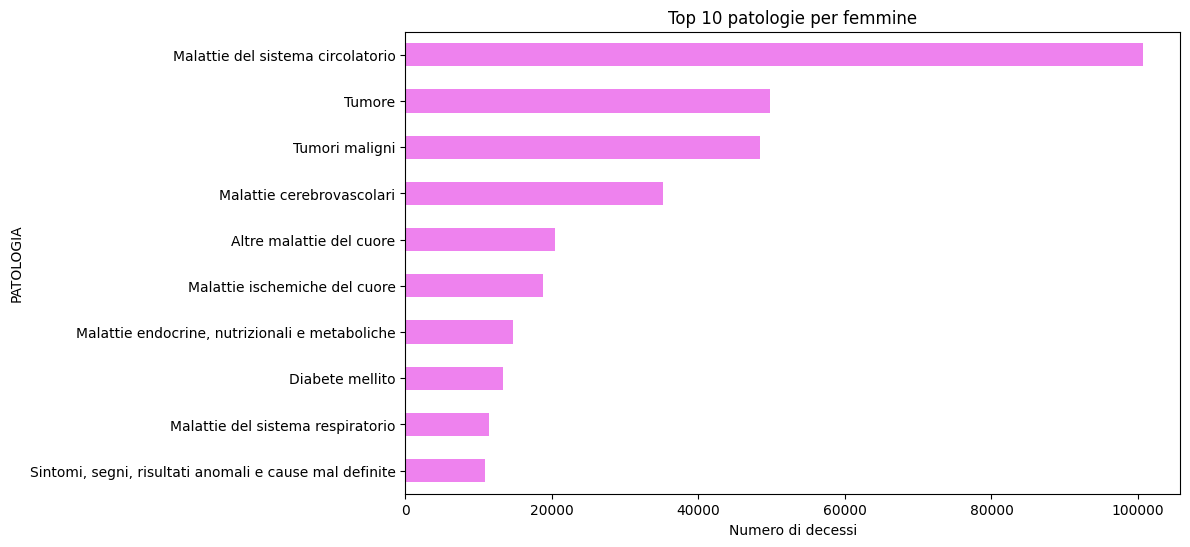

In [40]:
plt.figure(figsize=(10, 6))
top_10_patologie_femmine.plot(kind='barh', color='violet')
plt.xlabel('Numero di decessi')
plt.title('Top 10 patologie per femmine')
plt.gca().invert_yaxis()  # Per ordinare dal più alto al più basso
plt.show()


In [59]:
df['TOTALE'] = df['MASCHI'] + df['FEMMINE']

# *Territorio con maggior numero di patologie*

In [60]:

territorio_top = df.groupby('TERRITORIO')['TOTALE'].sum().sort_values(ascending=False).head(1)

print(territorio_top)

TERRITORIO
82053    111706
Name: TOTALE, dtype: int64


CODICE ISTAT 82053 = PALERMO

# Top 10 Territori con il Maggior Numero di Patologie Totali

In [61]:

top_10_territori = df.groupby('TERRITORIO')['TOTALE'].sum().sort_values(ascending=False).head(10)

print(top_10_territori)


TERRITORIO
82053    111706
87015     59181
83048     45949
89017     20622
81011     15672
88009     13599
81021     13022
85004     11513
85007     11149
84001     10292
Name: TOTALE, dtype: int64


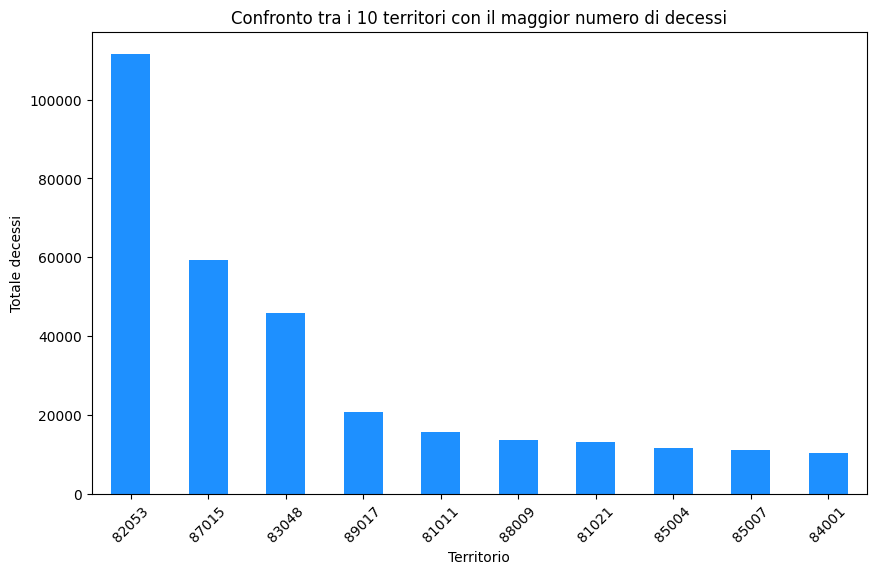

In [62]:

# Crea un grafico a barre per confrontare i 6 territori con il maggior numero di decessi
plt.figure(figsize=(10, 6))
top_10_territori.plot(kind='bar', color='dodgerblue')
plt.xlabel('Territorio')
plt.ylabel('Totale decessi')
plt.title('Confronto tra i 10 territori con il maggior numero di decessi')
plt.xticks(rotation=45)  # Ruota le etichette dei territori per una migliore leggibilità
plt.show()


82053: Palermo
87015: Mazara del Vallo
83048: Catania
89017: Messina
81011: Marsala
88009: Ragusa
81021: Trapani
85004: Enna
85007: Caltanissetta
84001: Agrigento

# Le patologie più comuni in ciascun territorio

In [82]:
patologie_territorio = df.groupby(['TERRITORIO', 'PATOLOGIA'])['TOTALE'].sum().unstack()
top_patologie_per_territorio = patologie_territorio.apply(lambda x: x.idxmax(), axis=1)
print(top_patologie_per_territorio)


TERRITORIO
81001    Malattie del sistema circolatorio
81002    Malattie del sistema circolatorio
81003    Malattie del sistema circolatorio
81004    Malattie del sistema circolatorio
81005    Malattie del sistema circolatorio
                       ...                
89017    Malattie del sistema circolatorio
89018    Malattie del sistema circolatorio
89019    Malattie del sistema circolatorio
89020    Malattie del sistema circolatorio
89021    Malattie del sistema circolatorio
Length: 390, dtype: object


*Si evince che le malattie cardiovascolari sono la prima causa di morte in tutto il territorio*

# Patologie più comuni in un territorio specifico (Canicattì)
CODICE ISTAT = 84011

In [188]:
territorio_canicatti = '84011'  # Codice ISTAT CANICATTI
patologie_canicatti = df[df['TERRITORIO'] == territorio_canicatti].groupby('PATOLOGIA')['TOTALE'].sum().sort_values(ascending=False).head(15)
print(patologie_canicatti)

PATOLOGIA
Malattie del sistema circolatorio                             1258
Tumore                                                         753
Tumori maligni                                                 740
Malattie cerebrovascolari                                      433
Malattie ischemiche del cuore                                  282
Altre malattie del cuore                                       253
Malattie endocrine, nutrizionali e metaboliche                 217
Diabete mellito                                                201
Malattie del sistema respiratorio                              160
Tumori maligni della laringe e della trachea/bronchi/polm.     156
Malattie del sistema nervoso e degli organi di senso           112
Malattie dell'apparato digerente                                96
Tumori maligni del colon                                        92
Cause esterne di traumatismo e avvelenamento                    80
Malattie croniche delle basse vie respiratorie      

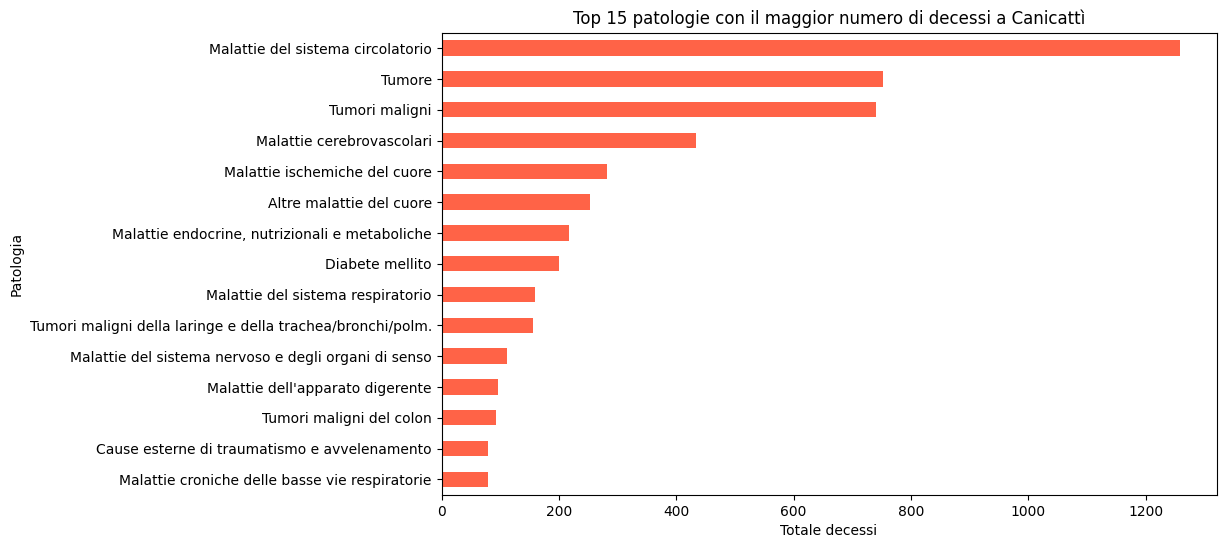

In [123]:
# Crea un grafico a barre per visualizzare le 15 patologie con il maggior numero di decessi nel territorio di Canicattì
plt.figure(figsize=(10, 6))
patologie_canicatti.plot(kind='barh', color='tomato')
plt.xlabel('Totale decessi')
plt.ylabel('Patologia')
plt.title('Top 15 patologie con il maggior numero di decessi a Canicattì')
plt.gca().invert_yaxis()  # Ordina dal più alto al più basso
plt.show()


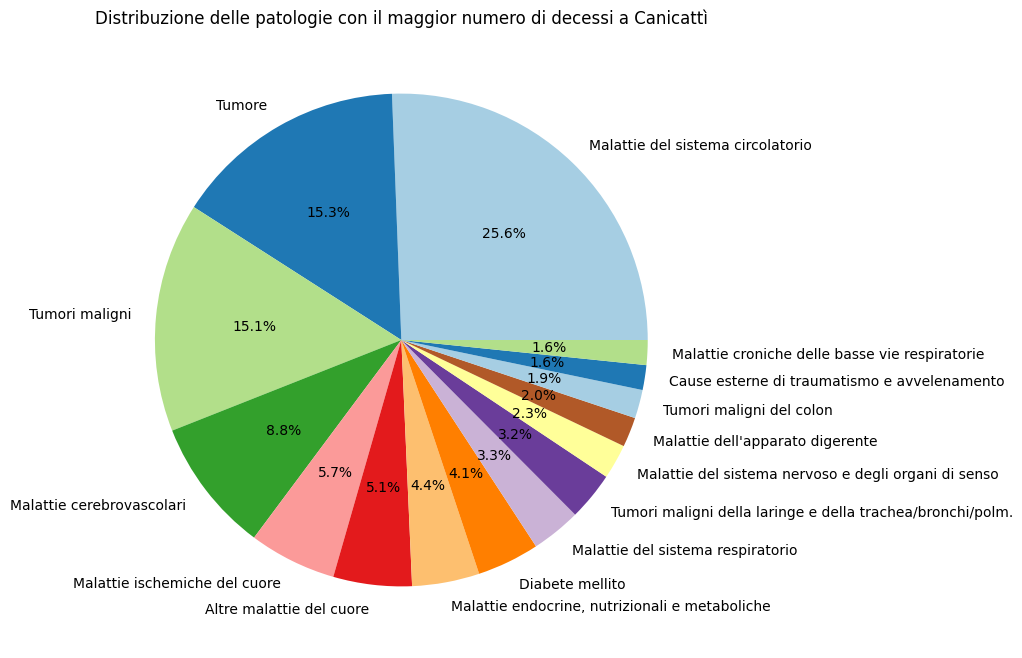

In [124]:
# Crea un grafico a torta per visualizzare la distribuzione percentuale delle patologie
plt.figure(figsize=(8, 8))
patologie_canicatti.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, legend=False)
plt.title('Distribuzione delle patologie con il maggior numero di decessi a Canicattì')
plt.ylabel('')
plt.show()


# Grafico a linee per confronto tra maschi e femmine a Canicattì (2009-2017)

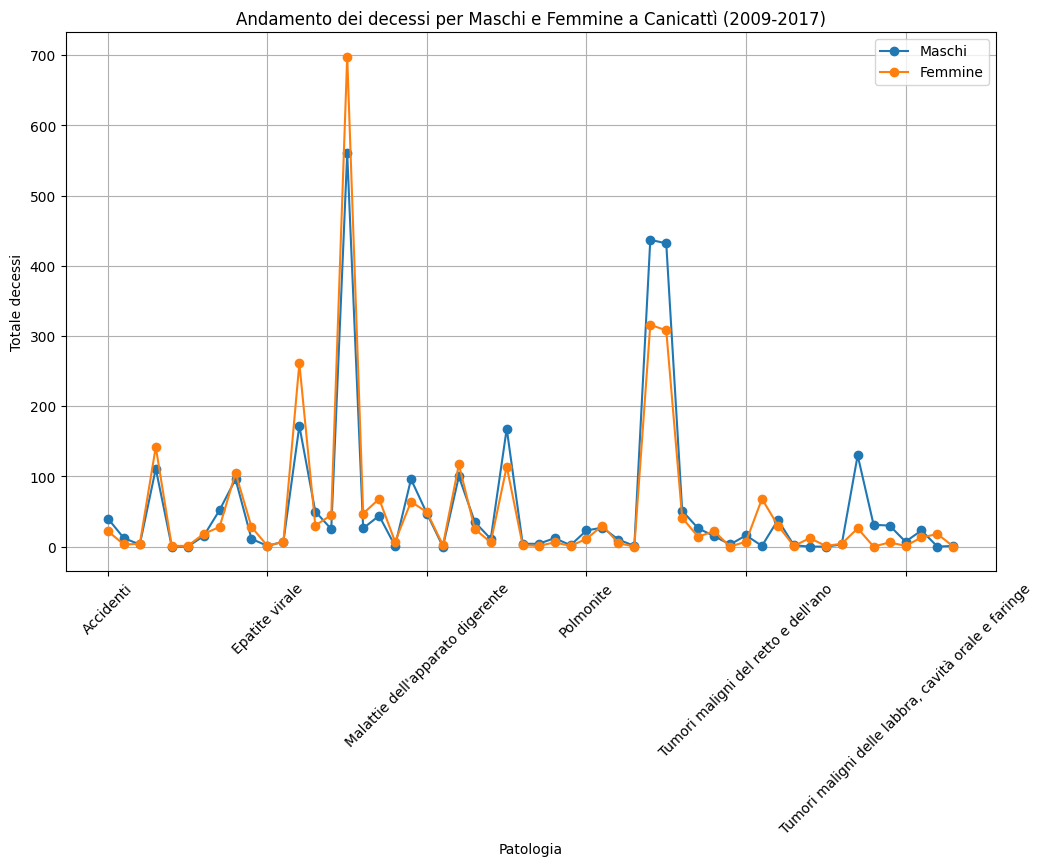

In [136]:
# Filtra il dataset per Canicattì (Codice ISTAT 84011)
df_canicatti = df[df['TERRITORIO'] == '84011']

# Raggruppa i dati per patologia e somma i decessi maschili e femminili a Canicattì
decessi_genere_per_periodo_canicatti = df_canicatti.groupby('PATOLOGIA')[['MASCHI', 'FEMMINE']].sum()

# Crea un grafico a linee per il confronto dei decessi maschili e femminili a Canicattì
decessi_genere_per_periodo_canicatti.plot(kind='line', figsize=(12, 7), marker='o')
plt.xlabel('Patologia')
plt.ylabel('Totale decessi')
plt.title('Andamento dei decessi per Maschi e Femmine a Canicattì (2009-2017)')
plt.legend(['Maschi', 'Femmine'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Matrice di correlazione tra maschi, femmine e totale decessi per patologia a Canicattì

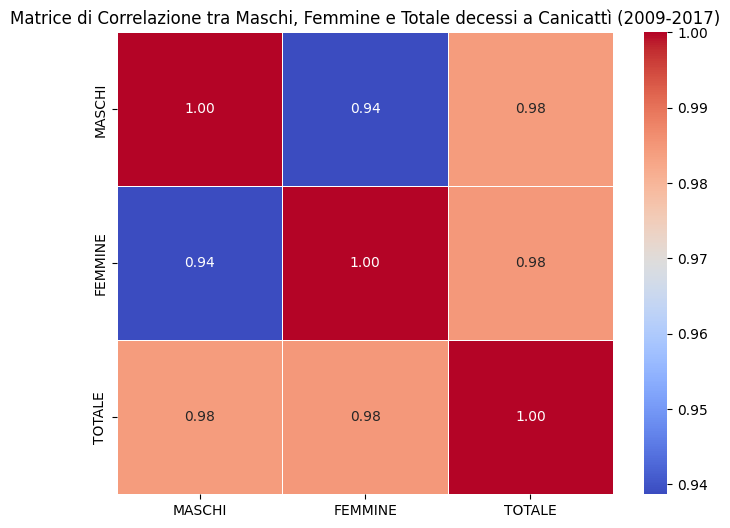

In [189]:
import seaborn as sns

# Filtra il dataset per Canicattì
df_canicatti = df[df['TERRITORIO'] == '84011']

# Raggruppa i dati per patologia e somma i decessi maschili e femminili a Canicattì
decesi_per_patologia_genere_canicatti = df_canicatti.groupby('PATOLOGIA')[['MASCHI', 'FEMMINE']].sum()

# Aggiunge la colonna Totale (somma dei decessi maschili e femminili)
decesi_per_patologia_genere_canicatti['TOTALE'] = decesi_per_patologia_genere_canicatti['MASCHI'] + decesi_per_patologia_genere_canicatti['FEMMINE']

# Calcola la matrice di correlazione
correlation_matrix = decesi_per_patologia_genere_canicatti[['MASCHI', 'FEMMINE', 'TOTALE']].corr()

# Crea una heatmap per visualizzare la matrice di correlazione
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione tra Maschi, Femmine e Totale decessi a Canicattì (2009-2017)')
plt.show()


# Grafico a barre per il confronto dei decessi maschili e femminili per "Tumori maligni dello stomaco"

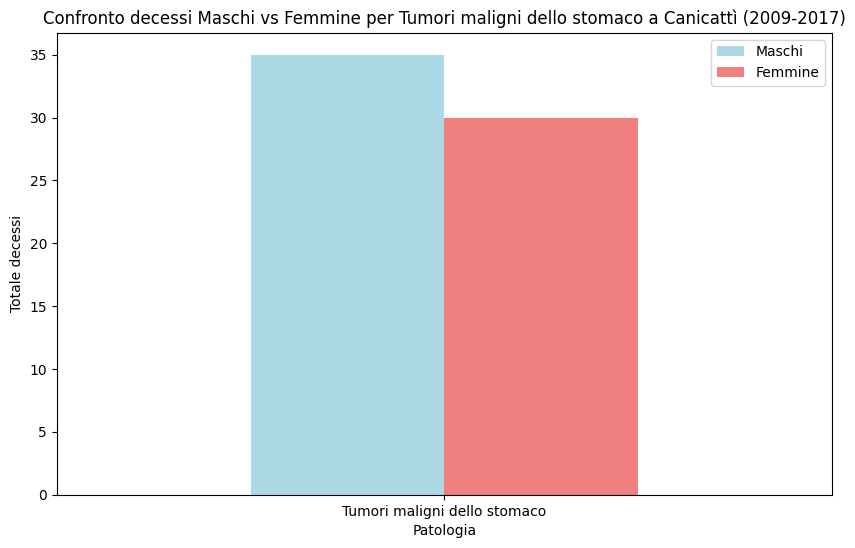

In [135]:
# Filtra i dati per "Tumori maligni dello stomaco" a Canicattì
df_tumoristomaco_canicatti = df[df['TERRITORIO'] == '84011'] 
tumoristomaco_canicatti = df_canicatti[df_canicatti['PATOLOGIA'] == 'Tumori maligni dello stomaco']

# Crea un grafico a barre per visualizzare i decessi maschili e femminili per questa patologia
tumoristomaco_canicatti.groupby('PATOLOGIA')[['MASCHI', 'FEMMINE']].sum().plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightcoral'])
plt.xlabel('Patologia')
plt.ylabel('Totale decessi')
plt.title('Confronto decessi Maschi vs Femmine per Tumori maligni dello stomaco a Canicattì (2009-2017)')
plt.xticks(rotation=0)
plt.legend(['Maschi', 'Femmine'])
plt.show()


# Grafico a torta decessi Diabete Mellito Canicatti

In [139]:
# Filtro il dataset per la patologia "Diabete Mellito" e il territorio di Canicattì
df_diabete_canicatti = df[df['TERRITORIO'] == '84011']  # Canicattì
df_diabete_canicatti = df_diabete_canicatti[df_diabete_canicatti['PATOLOGIA'] == 'Diabete mellito']

# Sommo i decessi per maschi e femmine
decesi_diabete_canicatti = df_diabete_canicatti[['MASCHI', 'FEMMINE']].sum()

# Stampa i totali
print(decesi_diabete_canicatti)


MASCHI      96
FEMMINE    105
dtype: int64


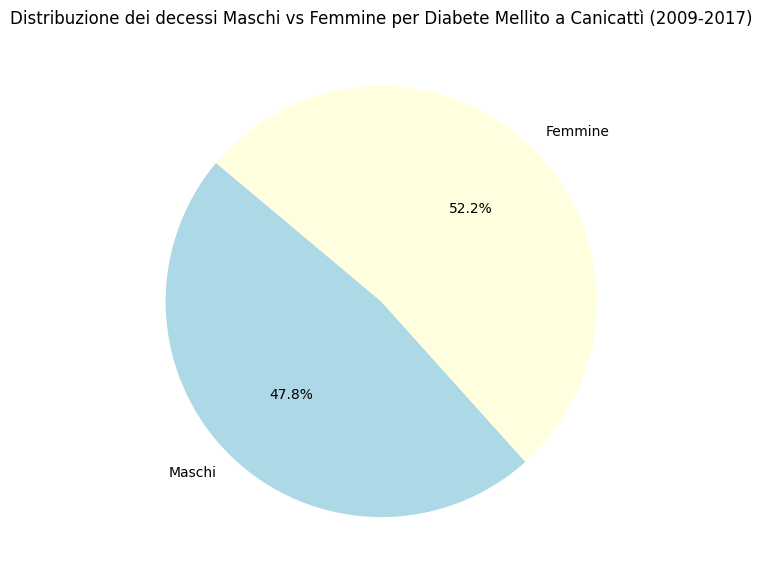

In [140]:
# Crea un grafico a torta per la distribuzione dei decessi maschili e femminili per Diabete Mellito
sizes = [decesi_diabete_canicatti['MASCHI'], decesi_diabete_canicatti['FEMMINE']]
labels = ['Maschi', 'Femmine']
colors = ['lightblue', 'lightyellow']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione dei decessi Maschi vs Femmine per Diabete Mellito a Canicattì (2009-2017)')
plt.show()


# Grafico a linee per il confronto dei decessi maschili e femminili nel tempo per TTumori maligni del rene a Canicattì

In [164]:
# Filtra il dataset per Canicattì (Codice ISTAT 84011)
df_canicatti = df[df['TERRITORIO'] == '84011']

# Filtra per la patologia "Tumori maligni della laringe e della trachea/bronchi/polm"
tumori_rene = df_canicatti[df_canicatti['PATOLOGIA'] == 'Tumori maligni del rene']

# Somma i decessi maschili e femminili per questa patologia
decessi_genere_per_patologia = tumori_rene.groupby('PATOLOGIA')[['MASCHI', 'FEMMINE']].sum()

print(decessi_genere_per_patologia)


                         MASCHI  FEMMINE
PATOLOGIA                               
Tumori maligni del rene       3        0


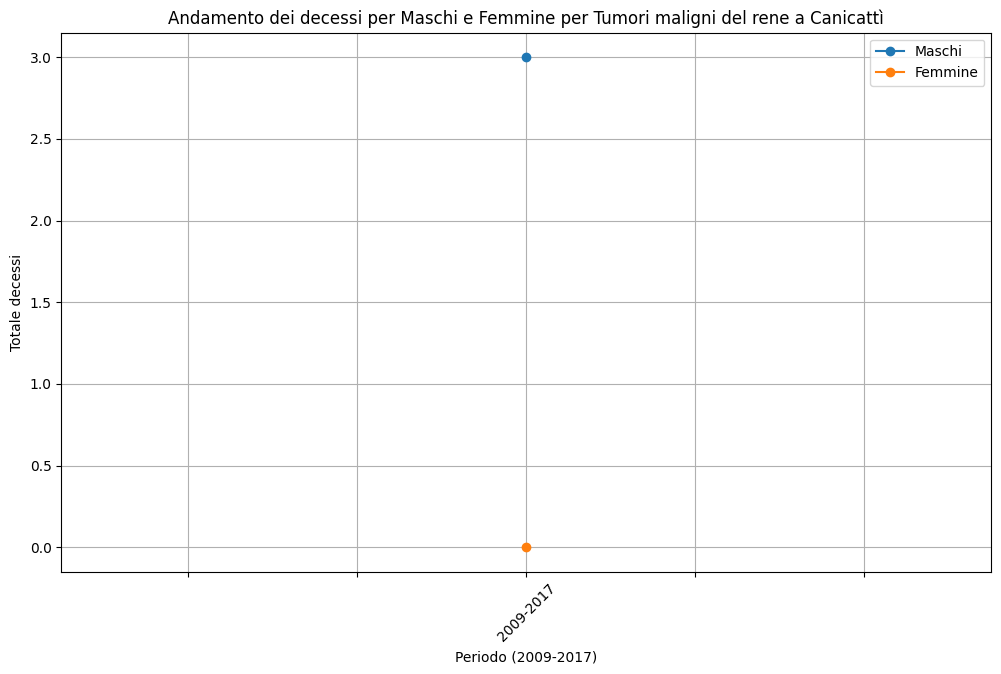

In [165]:

decesi_per_periodo = tumori_rene.groupby('PERIODO')[['MASCHI', 'FEMMINE']].sum()

# Crea un grafico a linee per il confronto dei decessi maschili e femminili
decesi_per_periodo.plot(kind='line', figsize=(12, 7), marker='o')
plt.xlabel('Periodo (2009-2017)')
plt.ylabel('Totale decessi')
plt.title('Andamento dei decessi per Maschi e Femmine per Tumori maligni del rene a Canicattì')
plt.legend(['Maschi', 'Femmine'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#   Heatmap della matrice di correlazione per maschi, femmine e totale dei decessi a Palermo

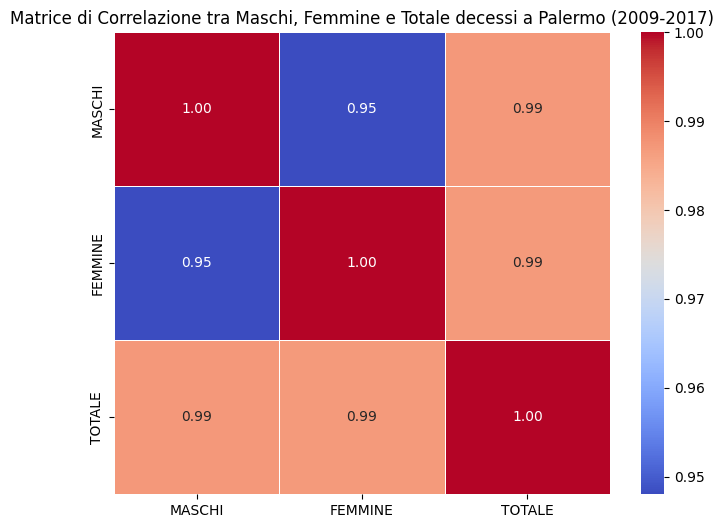

In [190]:
import seaborn as sns

# Raggruppa i dati per patologia e somma i decessi maschili e femminili a Palermo
decesi_per_patologia_genere_palermo = df_palermo.groupby('PATOLOGIA')[['MASCHI', 'FEMMINE']].sum()

# Aggiunge la colonna Totale (somma dei decessi maschili e femminili)
decesi_per_patologia_genere_palermo['TOTALE'] = decesi_per_patologia_genere_palermo['MASCHI'] + decesi_per_patologia_genere_palermo['FEMMINE']

# Calcola la matrice di correlazione
correlation_matrix_palermo = decesi_per_patologia_genere_palermo[['MASCHI', 'FEMMINE', 'TOTALE']].corr()

# Crea una heatmap per visualizzare la matrice di correlazione
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_palermo, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione tra Maschi, Femmine e Totale decessi a Palermo (2009-2017)')
plt.show()


# Grafico a torta Tumori maligni del rene Palermo

In [154]:
# Filtra il dataset per Palermo (Codice ISTAT 082053)
df_palermo = df[df['TERRITORIO'] == '82053']

# Filtra per la patologia "Tumori maligni del rene"
tumori_rene_palermo = df_palermo[df_palermo['PATOLOGIA'] == 'Tumori maligni del rene']

# Somma i decessi maschili e femminili per questa patologia
decessi_genere_per_patologia_palermo = tumori_rene_palermo.groupby('PATOLOGIA')[['MASCHI', 'FEMMINE']].sum()

print(decessi_genere_per_patologia_palermo)


                         MASCHI  FEMMINE
PATOLOGIA                               
Tumori maligni del rene      65       23


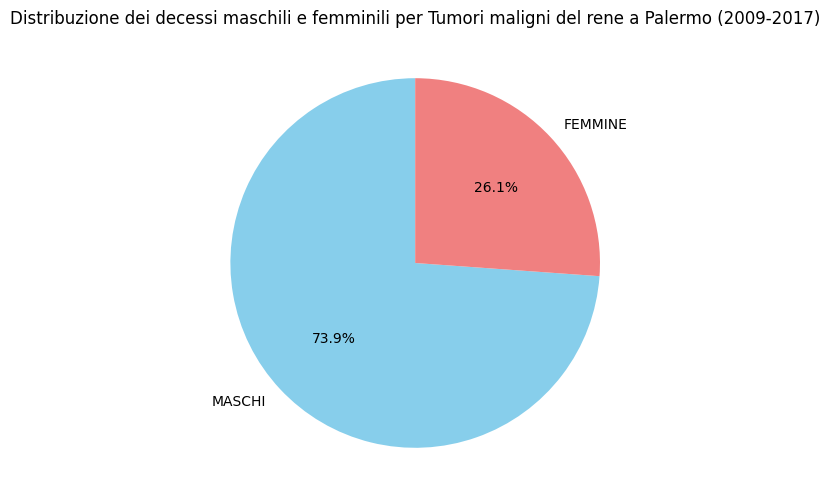

In [156]:
# Crea un grafico a torta per il confronto tra maschi e femmine
plt.figure(figsize=(10, 6))
decessi_genere_per_patologia_palermo[['MASCHI', 'FEMMINE']].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribuzione dei decessi maschili e femminili per Tumori maligni del rene a Palermo (2009-2017)')
plt.ylabel('')  # Rimuovi la label dell'asse y
plt.show()


#  Distribuzione delle malattie infettive e parassitarie (2009-2017) Palermo

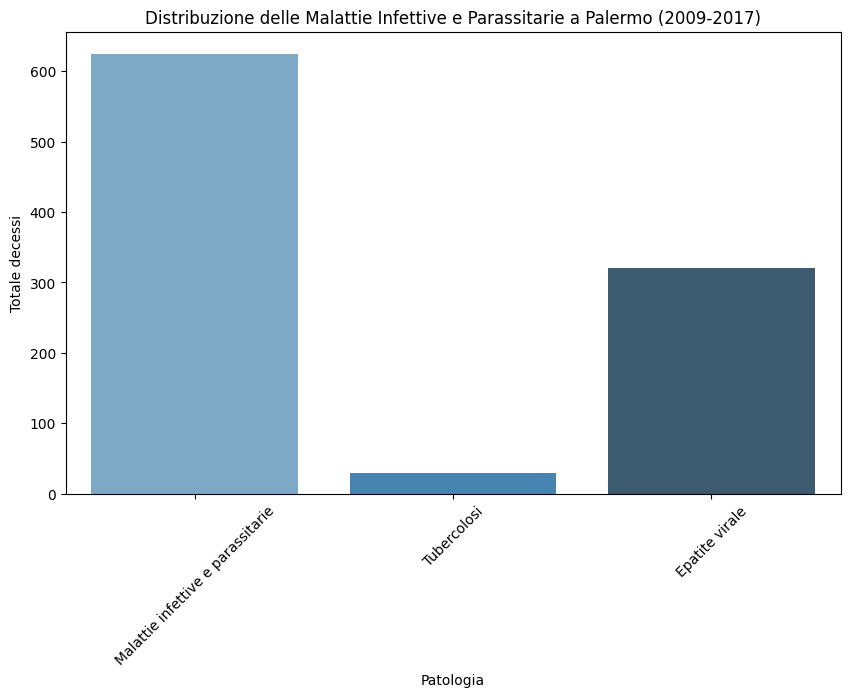

In [173]:
# Filtro il dataset per Palermo (codice ISTAT 82053)
territorio_palermo = '82053'
df_palermo = df[df['TERRITORIO'] == territorio_palermo]

# Seleziono solo le malattie infettive e parassitarie, tubercolosi, e epatite virale
malattie_infettive = df_palermo[df_palermo['PATOLOGIA'].isin(['Malattie infettive e parassitarie', 'Tubercolosi', 'Epatite virale'])]

# Crea un grafico a barre per visualizzare la distribuzione delle malattie infettive e parassitarie
plt.figure(figsize=(10, 6))
sns.barplot(data=malattie_infettive, x='PATOLOGIA', y='TOTALE', hue ='PATOLOGIA',  palette='Blues_d')
plt.xlabel('Patologia')
plt.ylabel('Totale decessi')
plt.title('Distribuzione delle Malattie Infettive e Parassitarie a Palermo (2009-2017)')
plt.xticks(rotation=45)
plt.show()


# Grafico a barre orizzontali per "Malattie ischemiche del cuore" Palermo

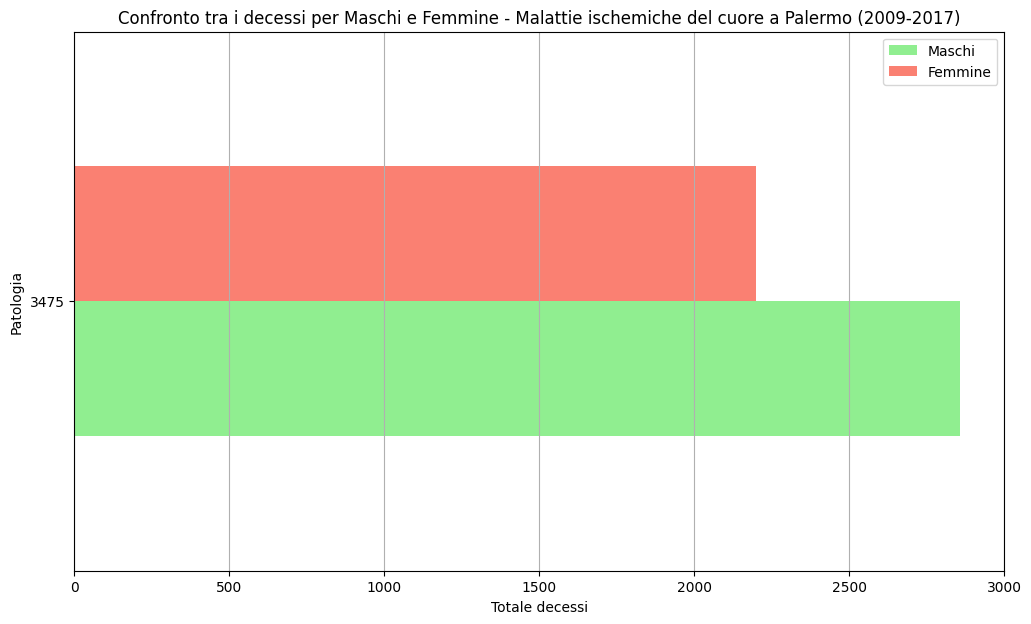

In [191]:
# Filtra i dati per "Malattie ischemiche del cuore"
malattie_ischemiche_palermo = df_palermo[df_palermo['PATOLOGIA'] == 'Malattie ischemiche del cuore']

# Crea un grafico a barre orizzontali per il confronto tra maschi e femmine
malattie_ischemiche_palermo[['MASCHI', 'FEMMINE']].plot(kind='barh', figsize=(12, 7), color=['lightgreen', 'salmon'])
plt.title('Confronto tra i decessi per Maschi e Femmine - Malattie ischemiche del cuore a Palermo (2009-2017)')
plt.xlabel('Totale decessi')
plt.ylabel('Patologia')
plt.legend(['Maschi', 'Femmine'])
plt.grid(True, axis='x')
plt.show()
# Filtro il dataset per Palermo (codice ISTAT 82053)
territorio_palermo = '82053'
df_palermo = df[df['TERRITORIO'] == territorio_palermo]

# Grafico a torta per analizzare la distribuzione percentuale dei decessi per le patologie principali a Palermo.

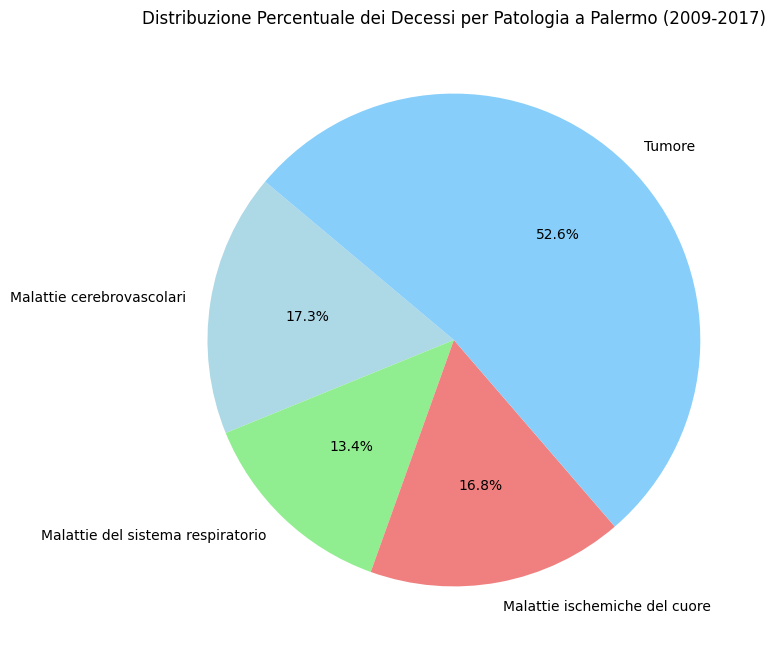

In [192]:
# Seleziona le patologie principali a Palermo
patologie_principali_palermo = df_palermo[df_palermo['PATOLOGIA'].isin(['Tumore', 'Malattie ischemiche del cuore', 'Malattie cerebrovascolari', 'Malattie del sistema respiratorio'])]

# Converte le colonne 'MASCHI' e 'FEMMINE' in numerico (forzando eventuali valori non numerici a NaN)
patologie_principali_palermo.loc[:, 'MASCHI'] = pd.to_numeric(patologie_principali_palermo['MASCHI'], errors='coerce')
patologie_principali_palermo.loc[:, 'FEMMINE'] = pd.to_numeric(patologie_principali_palermo['FEMMINE'], errors='coerce')

# Somma i decessi per maschi e femmine per ciascuna patologia
decesi_totali = patologie_principali_palermo[['MASCHI', 'FEMMINE']].sum(axis=1)

# Aggiungi i decessi totali per ogni patologia
decesi_per_patologia = patologie_principali_palermo['PATOLOGIA']
totale_decesi_per_patologia = decesi_totali.groupby(decesi_per_patologia).sum()

# Crea il grafico a torta per visualizzare la distribuzione percentuale dei decessi
plt.figure(figsize=(8, 8))
plt.pie(totale_decesi_per_patologia, labels=totale_decesi_per_patologia.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])

# Aggiunge il titolo
plt.title('Distribuzione Percentuale dei Decessi per Patologia a Palermo (2009-2017)')
plt.show()
